10


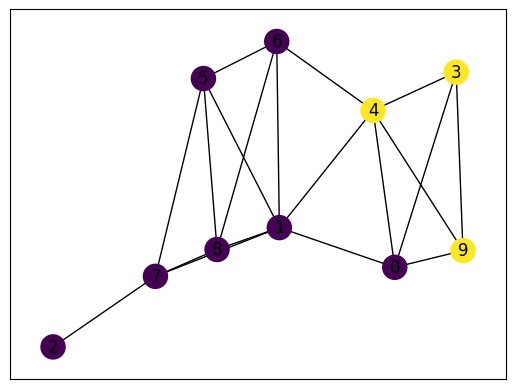

Cluster 1 Nodes: [0 1 2 5 6 7 8]
Medoid: 1
Cluster 2 Nodes: [3 4 9]
Medoid: 4


In [27]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from collections import defaultdict

# Load graph data
G = nx.random_geometric_graph(10, 0.5, seed=42)

# Compute pairwise distance matrix
dist_matrix = np.array(nx.floyd_warshall_numpy(G))

# Set number of clusters
k = 2

# Initialize K-medoids object and fit to distance matrix
kmedoids = KMedoids(n_clusters=k, metric='precomputed', random_state=123).fit(dist_matrix)

# Get cluster labels and medoids
labels = kmedoids.labels_
medoids = kmedoids.medoid_indices_

colors = defaultdict(lambda: len(colors))
print(len(labels))

# Assign colors to nodes based on cluster labels
color_map = [colors[label] for label in labels]

# Draw graph with node colors
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=300)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()

# Print results
for i in range(k):
    cluster_nodes = np.where(labels == i)[0]
    print('Cluster', i+1, 'Nodes:', cluster_nodes)
    print('Medoid:', medoids[i])

In [23]:
G = nx.Graph()

G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)


# Define subset of nodes to compute distance matrix for
nodes_subset = [0, 3, 5]

dist_matrix_all = np.array(nx.floyd_warshall_numpy(G))

dist_matrix = dist_matrix_all[np.ix_(nodes_subset, nodes_subset)]

print(dist_matrix)

k = 1
kmedoids = KMedoids(n_clusters=k, metric='precomputed', random_state=0).fit(dist_matrix)

print(kmedoids.medoid_indices_)

[[0. 3. 5.]
 [3. 0. 2.]
 [5. 2. 0.]]
[1]
